![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-10)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_2_EXERCISES.ipynb)

# Exercise 1: getting around GIT [OPTIONAL]

You will be provided with further slides on next Tuesday class (15/10/2019). Meanwhile you can try to do the following:

* Create a GitHub account
* Fork the [repository](https://github.com/vfp1/bts-mbds-data-science-foundations-2019) from the course
* Clone the repository in your own computer using `git clone`
* Create a folder within `/sessions` where you will be creating your own notebooks. Since we are using notebooks, it is better that you leave the nootebooks from the course untouched, and that you rather create a copy of them in the  `/sessions` folder where you can edit them. Trust me, it will save you a lot of **merge conflict** problems.
* Sync your fork to the remote origin (the original repo of the course) so you can update it with the new notebooks that I will be adding. Follow [this tutorial](https://help.github.com/en/articles/syncing-a-fork).
* Return this exercise by commiting the whole notebook in your own git and pass the url to me

# Exercise 2: more bikes [OBLIGATORY]

Given [this](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv) dataset:

* Open the dataset using Pandas
* Display the DataFrame
* Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * In each one of the years from the dataset. Which is the month with the highest number of bikes?
        * Plot each year with the number of bikes to also see it visually.
    * In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
        * Plot the hours with the average amount of riders.
    * In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.
        * Plot the bikers per hour using yearly average
        * When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
        * Plot the amount of bikers during those hours on weekdays

Display the DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bikes=pd.read_csv('Bikes.csv',index_col='Date')
bikes.index=pd.to_datetime(bikes.index)
print(bikes.index.dtype)
bikes=bikes.rename(columns={'Fremont Bridge East Sidewalk':'East', 'Fremont Bridge West Sidewalk':'West'})
bikes.sort_values(by=['Date'], inplace=True, ascending=True)

datetime64[ns]


In [2]:
bikes.head()

,East,West
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?

In [3]:
from scipy.stats import kurtosis
from scipy.stats import skew
print(bikes.skew())
print('-----------')
print(bikes.kurtosis())
bikes.describe()

#the comparison of mean and standard deviation in East and West show that there is much more variability 
# in the West compared to the east, being the SD of data in the East lower in value and close to the mean 
# st East= 67.8, mean East = 52.9
#also in the West there are hours with extremely high pick of traffic with max of 850 in one hour

#both East and West have a very high skewness (higher than 1), which shows that the distribution of Data is not 
#symmetric but left Skewed, henve far for resembling a normal curve.
#this can be seen also in the histograms below

East    2.428217
West    2.972636
dtype: float64
-----------
East     7.627930
West    11.262171
dtype: float64


,East,West
count,61287.000000,61287.000000
mean,52.894790,61.444874
std,67.815951,89.875981
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,71.000000,74.000000
max,698.000000,850.000000


/Users/gvaccar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gvaccar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'West side of the Beidge')

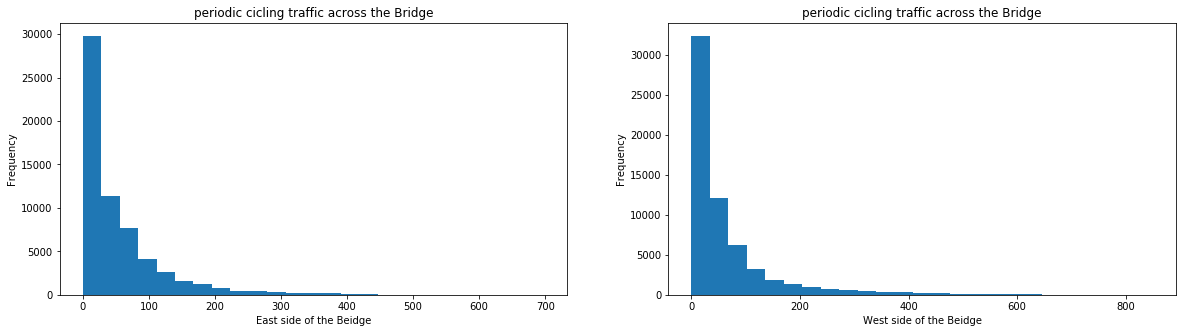

In [4]:
#histograms of the distributions

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(bikes['East'], bins=25)
plt.title('periodic cicling traffic across the Bridge')
plt.ylabel('Frequency')
plt.xlabel('East side of the Beidge')

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(bikes['West'], bins=25)
plt.title('periodic cicling traffic across the Bridge')
plt.ylabel('Frequency')
plt.xlabel('West side of the Beidge')

In each one of the years from the dataset. Which is the month with the highest number of bikes?
Plot each year with the number of bikes to also see it visually

In [5]:
bikes['Total'] = bikes['East']+bikes['West']
bikes.head(2)

,East,West,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0


In [6]:
totals=bikes[['Total']].copy()
totals_max_month=totals.resample('M').sum()
print(totals_max_month.groupby(totals_max_month.index.year).idxmax().Total.apply(lambda x: x.strftime('%B')))
print(totals_max_month.groupby(totals_max_month.index.year).max())

Date
2012    October
2013       July
2014       July
2015       June
2016        May
2017     August
2018        May
2019     August
Name: Total, dtype: object
         Total
Date          
2012   65695.0
2013  117974.0
2014  120669.0
2015  113717.0
2016  114159.0
2017  120188.0
2018  129813.0
2019  142414.0


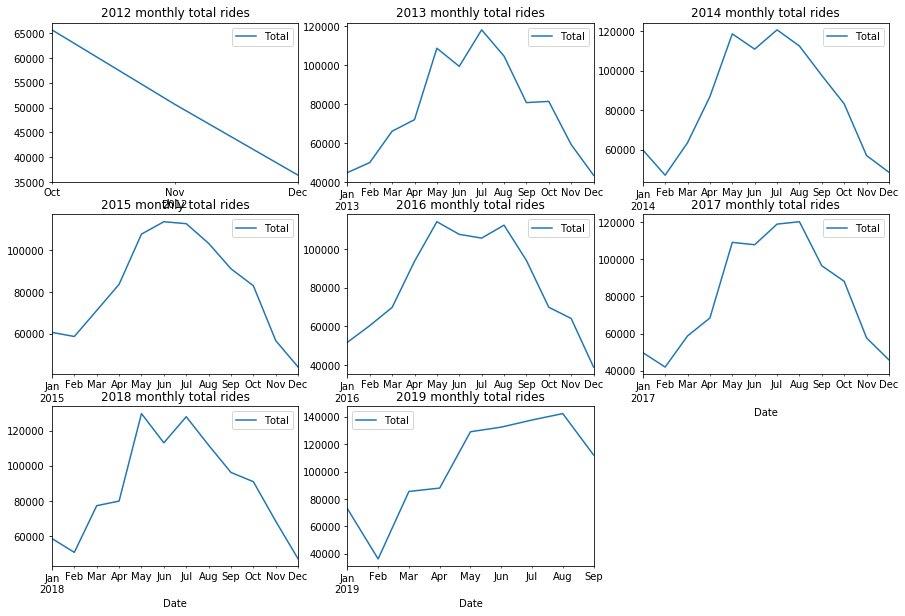

In [210]:
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot(3, 3, 1)
totals_max_month['2012'].plot(ax=ax1, title='2012 monthly total rides',
                              style=['-']);

ax2 = fig.add_subplot(3, 3, 2)
totals_max_month['2013'].plot(ax=ax2, title='2013 monthly total rides',
                              style=['-']);

ax3 = fig.add_subplot(3, 3, 3)
totals_max_month['2014'].plot(ax=ax3, title='2014 monthly total rides',
                              style=['-']);

ax4 = fig.add_subplot(3, 3, 4)
totals_max_month['2015'].plot(ax=ax4, title='2015 monthly total rides',
                              style=['-']);

ax5 = fig.add_subplot(3, 3, 5)
totals_max_month['2016'].plot(ax=ax5, title='2016 monthly total rides',
                              style=['-']);

ax6 = fig.add_subplot(3, 3, 6)
totals_max_month['2017'].plot(ax=ax6, title='2017 monthly total rides',
                              style=['-']);

ax7 = fig.add_subplot(3, 3, 7)
totals_max_month['2018'].plot(ax=ax7, title='2018 monthly total rides',
                              style=['-']);

ax8 = fig.add_subplot(3, 3, 8)
totals_max_month['2019'].plot(ax=ax8, title='2019 monthly total rides',
                              style=['-']);

In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
Plot the hours with the average amount of riders.

In [332]:
totals['Weekdays'] = totals.index.weekday
totals['Hours'] = totals.index.hour
hour_least_riders=totals.groupby(['Weekdays','Hours']).mean()

hour_least_riders.groupby('Weekdays').idxmin()

# Answer. for each dy of the week the hours with the least amount of riders is 3:am

,Total
Weekdays,
0,"(0, 3)"
1,"(1, 3)"
2,"(2, 3)"
3,"(3, 3)"
4,"(4, 3)"
5,"(5, 3)"
6,"(6, 3)"


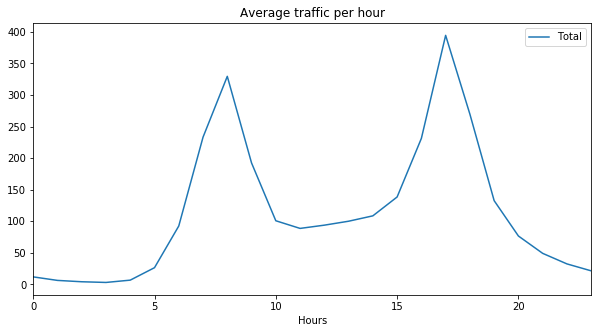

In [343]:
average_riders_per_hour =hour_least_riders.groupby('Hours').mean()

fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(1, 1, 1)
average_riders_per_hour.plot(ax=ax,title='Average traffic per hour',style=['-']);


In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.

Plot the bikers per hour using yearly average

When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?

Plot the amount of bikers during those hours on weekdays

In [9]:
year_2019= bikes.loc['2019']
print(year_2019.mean())
# the route with less people is Rout East

East      55.194292
West      87.709860
Total    142.904151
dtype: float64


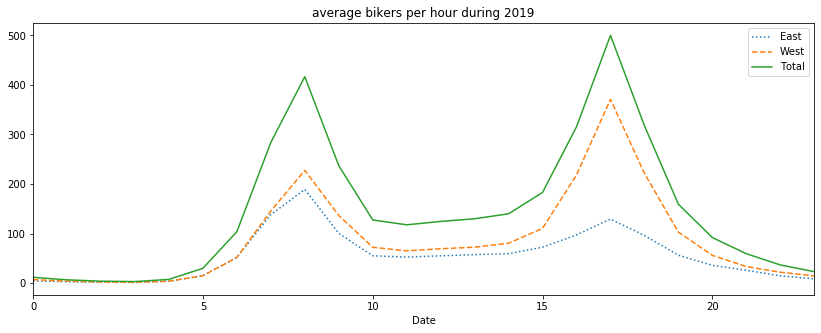

In [10]:
bikers_hour= year_2019.groupby(year_2019.index.hour).mean()
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
bikers_hour.plot(ax=ax, title='average bikers per hour during 2019',style=[':', '--', '-']);

In [11]:
#When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
weekday= np.where(year_2019.index.weekday > 5, 'Weekday', 'Weekend')

weekday_2019 = year_2019.groupby([weekday,year_2019.index.time]).mean()
weekday_2019.loc['Weekday'][10:16].idxmin()

#answer: the best is at 10 o'clock in both East and West

East     10:00:00
West     10:00:00
Total    10:00:00
dtype: object

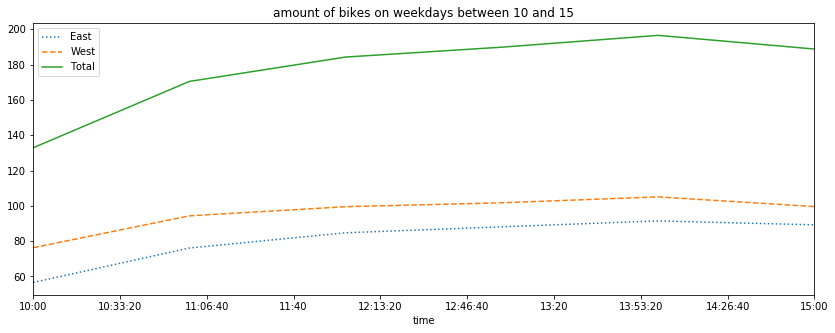

In [12]:
#Plot the amount of bikers during those hours on weekdays
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
weekday_2019.loc['Weekday'][10:16].plot(ax=ax, title='amount of bikes on weekdays between 10 and 15',style=[':', '--', '-']);


# Exercise 3: SQLite and Pandas [OBLIGATORY]

Download [this Sqlite database](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db)

You can either use SQLite database entirely or load the SQL query in Pandas to reply to the following questions:

*   Which is the highest city that as an airport?
*   And which is the lowest city that as an airport?
*   Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.
*   Which country has more airlines? And which one has less?
*   Which city has the most outgoing destinations? And the least?
*   And which city has the most incoming destinations? And the least?



In [13]:
import sqlite3

def connect_database(db_name):
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

In [14]:
connection, cursor = connect_database('flights.db')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('airports',), ('airlines',), ('routes',)]


Which is the highest city that as an airport?

In [32]:
# i am using CAST (Altutude AS float given that the altitude values in the Database are reported as strings,
# hence I am converting them in floats)

first_query = '''SELECT city, CAST(altitude AS float)
FROM airports
ORDER BY 2 DESC
LIMIT 3'''

cities_altitude = pd.read_sql_query(first_query, connection)
cities_altitude
#answer: the city that has an airport with the highest altitude are Akola and Dauphin

,city,CAST(altitude AS float)
0,Daocheng,14472.0
1,Bangda,14219.0
2,Kangding,14042.0


And which is the lowest city that as an airport?

In [34]:
second_query = '''SELECT city, CAST(altitude AS float)
FROM airports
ORDER BY 2 ASC
LIMIT 3'''

cities_altitude_lowest = pd.read_sql_query(second_query, connection)
cities_altitude_lowest

#answer is Metzada

,city,CAST(altitude AS float)
0,Metzada,-1266.0
1,Eyn-yahav,-164.0
2,Ramsar,-70.0


Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them.

In [60]:
third_query = '''SELECT timezone, COUNT(name)
FROM airports
GROUP BY timezone
ORDER BY COUNT (name) DESC'''


timezones = pd.read_sql_query(third_query, connection)
timezones=timezones.rename(columns={'COUNT(name)': 'number of airports'})
timezones.head()

,timezone,number of airports
0,America/New_York,628
1,America/Chicago,373
2,Europe/Berlin,319
3,America/Anchorage,258
4,Europe/Paris,232


Plot it as a histogram as well.

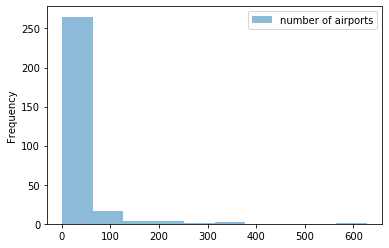

In [88]:
timezones.plot.hist(alpha=0.5)

Which country has more airlines? And which one has less?

In [113]:
query4='''SELECT country, COUNT(name)
FROM airlines
GROUP BY country
ORDER BY COUNT(name) DESC
LIMIT 3'''

more_airlines = pd.read_sql_query(query4, connection)
more_airlines=more_airlines.rename(columns={'COUNT(name)': 'number of airlines'})
more_airlines
#answer: the countrywith more airlines (including active and not active) is USA

,country,number of airlines
0,United States,1080
1,Mexico,439
2,United Kingdom,407


In [121]:
query5='''SELECT country, COUNT(name)
FROM airlines
GROUP BY country
ORDER BY COUNT(name) ASC
lIMIT 5'''

less_airlines = pd.read_sql_query(query5, connection)
less_airlines=less_airlines.rename(columns={'COUNT(name)': 'number of airlines'})
less_airlines

,country,number of airlines
0,Boonville Stage Line,1
1,S.A.,1
2,ACOM,1
3,ACTIVE AERO,1
4,AEROCENTER,1


Which city has the most outgoing destinations? And the least?

In [159]:
query11='''SELECT city, COUNT(dest)
FROM routes AS rt INNER JOIN airports AS arp
ON rt.dest = arp.code
GROUP BY city
ORDER BY 2 DESC
LIMIT 3'''

overview = pd.read_sql_query(query11, connection)
overview
# anwer: the city with the most outgoing destination is London

,city,COUNT(dest)
0,London,1224
1,Atlanta,911
2,Paris,720


In [168]:
query12='''SELECT city, COUNT(dest)
FROM routes AS rt INNER JOIN airports AS arp
ON rt.dest = arp.code
GROUP BY city
ORDER BY 2 ASC
LIMIT 3'''

overview = pd.read_sql_query(query12, connection)
overview

,city,COUNT(dest)
0,Abu Simbel,1
1,Achutupo,1
2,Adak Island,1


And which city has the most incoming destinations? And the least?

In [163]:
query13='''SELECT city, COUNT(source)
FROM routes AS rt INNER JOIN airports AS arp
ON rt.source = arp.code
GROUP BY city
ORDER BY 2 DESC
LIMIT 3'''

overview = pd.read_sql_query(query13, connection)
overview
# anwer: the city with the most incoming destination is London

,city,COUNT(source)
0,London,1232
1,Atlanta,915
2,Paris,725


In [169]:
query14='''SELECT city, COUNT(source)
FROM routes AS rt INNER JOIN airports AS arp
ON rt.source = arp.code
GROUP BY city
ORDER BY 2 ASC
LIMIT 3'''

overview = pd.read_sql_query(query14, connection)
overview

,city,COUNT(source)
0,Abu Simbel,1
1,Achutupo,1
2,Adak Island,1
